## Observations and Insights

In this study 249 mice were treated with a variety of drugs over the course of 45 days. The purpose of this study was to observe and measure tumor growth and compare the performance of drug regimens. The following is the list of  the observations made from the data.

* From the summary statistics table, it is obvious that two drugs, Ramicane and Capomulin, are showing the best performance by all parameters. They are very close to each other and far from the rest of the drugs used in this study.


* These  two drugs were studied more intensively. They have around 230 observations each, while other drugs have around 180 observations each.


* Mice sex distribution was almost equal, with 124 females ( 49.8%) and 125 males (50.2%).


* After calculating quartiles and IQR for the final tumor volume of each mouse across four most promising drug regimens, we can conclude again that Ramicane and Capomulin are the best performing drugs. This study shows slightly better performance of Ramicane. The only outlier was found for Infubinol. Box and whisker plot confirms these insights.


* Majority of mice under Capomolin regimen are showing tumor volume decrease during the study time.


* There is a strong positive correlation (0.84) between average tumor volume and mouse weight for the Capomulin regimen. R-squared is around 0.71.


## Dependencies

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [7]:
# Combine the data into a single dataset
study_full = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')
study_full.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
study_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


## Summary statistics

#### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [9]:
# List unique drug regimens
study_full['Drug Regimen'].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [10]:
# Create groupby object
drug_gb = study_full.groupby('Drug Regimen')

In [11]:
# Create summary statistics dataframe
summary_stats = drug_gb['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns
summary_stats = summary_stats.rename(columns={'mean': 'Mean', 
                                              'median': 'Median', 
                                              'var': 'Variance',
                                              'std': 'Standard Deviation',
                                              'sem': 'SEM'
                                             })
# Sort dataframe by SEM
summary_stats.sort_values(by='SEM')

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

#### Generate a bar plot showing number of data points for each treatment regimen using pandas

In [12]:
# Group by drug regimen, count and convert series to dataframe
drug_df = drug_gb['Drug Regimen'].count().to_frame(name='Data Points')
drug_df

,Data Points
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


In [13]:
# Set x axis (drugs) and y axis (data_points)
drugs = drug_df.index
data_points = drug_df['Data Points']

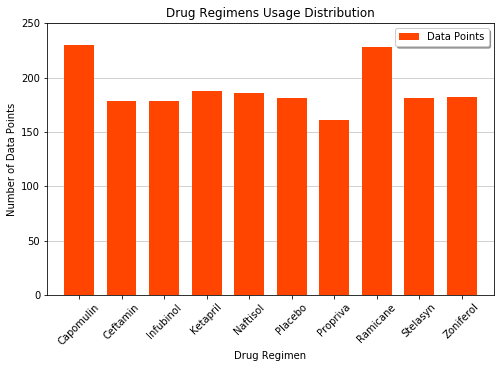

In [17]:
# Generate bar plot
fig, ax = plt.subplots(figsize=(8, 5))
data_points.plot(kind='bar',
                 color='orangered',
                 alpha=1,
                 legend=True,
                 rot=45,
                 width=0.7,
                 ax=ax)                                       

# Set textual properties
plt.title('Drug Regimens Usage Distribution')
plt.ylabel('Number of Data Points')
plt.legend(fancybox=True, shadow=True)

# set grid for y axis
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.7)

# Set limits
plt.xlim(-0.75, len(drugs)-0.25)
plt.ylim(0, max(data_points)+20)

plt.show()

#### Generate a bar plot showing number of data points for each treatment regimen using pyplot

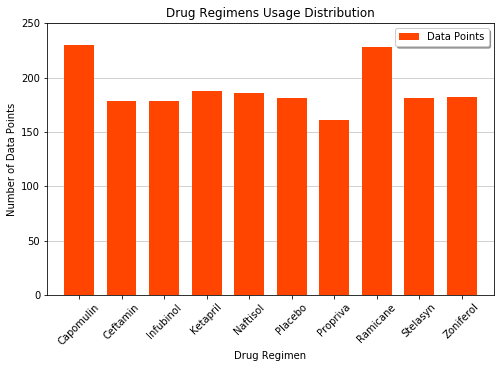

In [27]:
# Generate bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(drugs,
       data_points,
       color='orangered',
       label=data_points.name,
       alpha=1,
       width=0.7)

# Set textual properties
plt.title('Drug Regimens Usage Distribution')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.legend(fancybox=True, shadow=True)

# set grid for y axis
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.7)

# Set limits
plt.xlim(-0.75, len(drugs)-0.25)
plt.ylim(0, max(data_points)+20)

plt.xticks(rotation=45)

plt.show()

## Pie plots

#### Generate a pie plot showing the distribution of female versus male mice using pandas

In [15]:
# Group by sex, count and convert to dataframe
sex_dist = study_full.groupby('Sex')['Mouse ID'].nunique().to_frame(name='Count')
sex_dist

,Count
Sex,
Female,124
Male,125


In [16]:
# Set variable for y axis title
y_axis = sex_dist.columns[0]
y_axis

'Count'

In [17]:
# Change colors
colors = ['pink', 'royalblue']

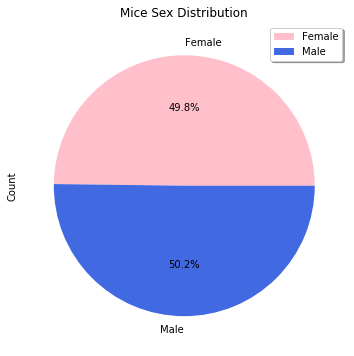

In [18]:
# Generate a pie plot using pandas
sex_dist.plot(kind='pie', 
              title='Mice Sex Distribution', 
              y=y_axis, 
              autopct='%1.1f%%',
              figsize=(6,6), 
              colors=colors)

plt.legend(shadow=True)

plt.show()

#### Generate a pie plot showing the distribution of female versus male mice using pyplot

In [19]:
# Create list of sexes
sex_list = sex_dist.index
sex_list

Index(['Female', 'Male'], dtype='object', name='Sex')

In [20]:
# Create data (count of each sex) for plotting
sex_count = sex_dist.Count
sex_count

Sex
Female    124
Male      125
Name: Count, dtype: int64

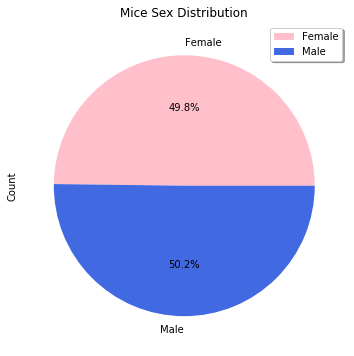

In [21]:
# Generate a pie plot using pyplot
fig, ax = plt.subplots(figsize=(6,6))
plt.pie(sex_count,
        labels=sex_list, 
        autopct='%1.1f%%',
        colors=colors)

# Set textual properties
plt.ylabel(y_axis)
plt.title('Mice Sex Distribution')
plt.legend(sex_list, shadow=True)

plt.show()

## Quartiles, outliers and boxplots

#### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [22]:
study_full.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Create dataframe with final tumor volume timepoint for each mouse
final_timep = study_full.groupby('Mouse ID')['Timepoint'].max().reset_index()
print(final_timep.shape)
final_timep.head()

(249, 2)


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [24]:
# List top 4 drug regimens per SEM values
top4 = summary_stats.SEM.sort_values().index[0:4]
top4

Index(['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol'], dtype='object', name='Drug Regimen')

In [25]:
# Keep only top 4 drug regimens in new dataframe
top4_df = study_full[study_full['Drug Regimen'].isin(top4)].reset_index(drop=True)
print(top4_df.shape)
top4_df.head()

(814, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,c326,0,45.0,0,Infubinol,Female,18,25
2,c139,0,45.0,0,Infubinol,Male,11,28
3,v339,0,45.0,0,Infubinol,Male,20,26
4,a577,0,45.0,0,Infubinol,Female,6,25


In [26]:
# Create dataframe with final tumor volumes for top 4 drug regimens
ftv_df = pd.merge(final_timep, top4_df, on=['Mouse ID', 'Timepoint'])
print(ftv_df.shape)
ftv_df.head()

(100, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


**The next cell will do the following:**

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

* Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

* Prepare data for the summary quartiles stats table.

* Prepare data for box plots.

In [27]:
# Initaalize lists for box plotting
box_labels = []
box_data = []

# Initialzie lists for quartiles, iqr, bounds, min, max and number of outliers
lql, uql, medl, iqrl, lbl, ubl = [], [], [], [], [], [] 
minl, maxl, outl = [], [], []

# start looping through top 4 drug regimens
for drug_reg in top4:
    
    # Create dataframe for one drug only     
    drug_df = ftv_df.loc[ftv_df['Drug Regimen'] == drug_reg]
    # Create series for tumor volumes
    volumes = drug_df['Tumor Volume (mm3)']
    
    # Update lists for box plotting
    box_data.append(volumes)
    box_labels.append(drug_reg)
    
    # Calculate quartiles
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    median = quartiles[0.5]
    iqr = upperq-lowerq
    
    # Append lists for qurtiles
    lql.append(lowerq)
    uql.append(upperq)
    medl.append(median)
    iqrl.append(iqr)

    # Calculate max and min values for tumors and append lists
    maxv = volumes.max()
    minv = volumes.min()
    maxl.append(maxv)
    minl.append(minv)
    
    print(f'\n*** Tumor Volumes for {drug_reg.upper()} ****')

    # Calculate lower and upper bounds and append lists
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    lbl.append(lower_bound)
    ubl.append(upper_bound)
    
    # Check for outliers
    out_volumes = drug_df.loc[(volumes < lower_bound) | (volumes > upper_bound)]
    outl.append(len(out_volumes))
    
    # If there are outliers display them
    print(f"Number of Outliers: {len(out_volumes)}")
    if len(out_volumes) > 0:
        display(out_volumes.head())
        print()

# Create dictionary for quartile statistics dataframe
quart_dict = {'Drug Regimen': top4,
              '25%': lql,
              '50%': medl,
              '75%': uql,
              'IQR': iqrl,
              'Lower Bound': lbl,
              'Min. Volume': minl,
              'Upper Bound': ubl,
              'Max. Volume': maxl,
              'Outliers': outl
             }


*** Tumor Volumes for RAMICANE ****
Number of Outliers: 0

*** Tumor Volumes for CAPOMULIN ****
Number of Outliers: 0

*** Tumor Volumes for CEFTAMIN ****
Number of Outliers: 0

*** Tumor Volumes for INFUBINOL ****
Number of Outliers: 1


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
15,c326,5,36.321346,0,Infubinol,Female,18,25


**Display summary quartiles statistics table**

In [28]:
# Create dataframe, set index and transpose dataframe
quart_stats = pd.DataFrame(quart_dict).set_index('Drug Regimen').T

# Delete name for columns axis
quart_stats.columns.name = None

# Format numbers for nicer look
for col in range(4):
    quart_stats.iloc[: -1, col] = quart_stats.iloc[: -1, col].astype('float').map('{:.6f}'.format)
    
quart_stats.loc['Outliers',:] = quart_stats.loc['Outliers',:].astype('int32').map('{:d}'.format)

quart_stats

,Ramicane,Capomulin,Ceftamin,Infubinol
25%,31.560470,32.377357,48.722078,54.048608
50%,36.561652,38.125164,59.851956,60.165180
75%,40.659006,40.159220,64.299830,65.525743
IQR,9.098537,7.781863,15.577752,11.477135
Lower Bound,17.912664,20.704562,25.355450,36.832905
Min. Volume,22.050126,23.343598,45.000000,36.321346
Upper Bound,54.306811,51.832015,87.666458,82.741446
Max. Volume,45.220869,47.685963,68.923185,72.226731
Outliers,0,0,0,1


#### Generate a box plot of the final tumor volume of each mouse across four regimens of interest

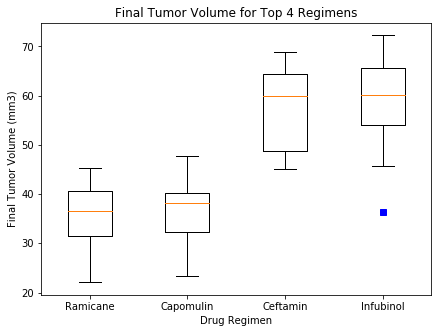

In [29]:
# Generate box and whisker plot, blue square for outliers
fig1, ax1 = plt.subplots(figsize=(7,5))
ax1.boxplot(box_data, 0, 'bs', labels=box_labels)

# Set textual properties
ax1.set_title('Final Tumor Volume for Top 4 Regimens')
ax1.set_ylabel(f"Final {box_data[0].name}")
ax1.set_xlabel('Drug Regimen')

plt.show()

## Line and scatter plots

#### Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [30]:
# Create dataframe for one drug regimen only
drug = 'Capomulin'
one_drug_df = study_full.loc[(study_full['Drug Regimen'] == drug)].reset_index(drop=True)
                              
print(one_drug_df.shape)
one_drug_df.head()

(230, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,j246,0,45.0,0,Capomulin,Female,21,21
2,r554,0,45.0,0,Capomulin,Female,8,17
3,s185,0,45.0,0,Capomulin,Female,3,17
4,b742,0,45.0,0,Capomulin,Male,7,21


**Choose a mouse, from the given list, for which to display a line plot of time point versus tumor volume.**

In [31]:
# Create mice list
mice_ids = one_drug_df['Mouse ID'].unique()
mice_ids = ', '.join(mice_ids)

# Input mouse id
print(f"List of mice:\n {mice_ids}\n")
mouse_id = input(f"Choose a mouse from the list: ").lower()

List of mice:
 b128, j246, r554, s185, b742, x401, l509, s710, r157, u364, j119, v923, w914, i738, r944, y793, g316, g288, l897, w150, t565, i557, m957, f966, m601

Choose a mouse from the list: b128


In [32]:
# Create dataframe (timepoint and tumor volume) for one drug and one mouse
# In case of incorrect input use default mouse ID
mouse_id_def = 'm601'

if (mouse_id not in one_drug_df['Mouse ID'].unique()):
    mouse_id = mouse_id_def
    
time_tvol = one_drug_df.loc[one_drug_df['Mouse ID'] == mouse_id, 
                            ['Timepoint', 'Tumor Volume (mm3)']].reset_index(drop=True)
    
print(time_tvol.shape)
time_tvol.head(2)

(10, 2)


,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,45.651331


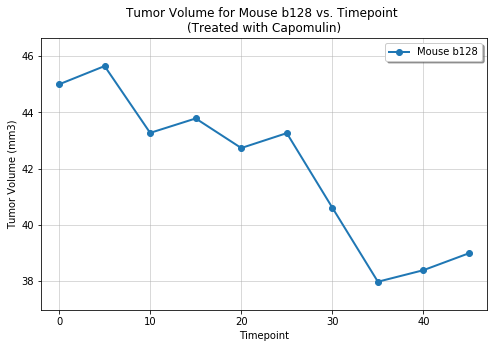

In [33]:
# Calculate min and max for y axis 
ymax = time_tvol.iloc[:,1].max()
ymin = time_tvol.iloc[:,1].min()
xmax = time_tvol.iloc[:,0].max()
xmin = time_tvol.iloc[:,0].min()

# Generate line plot
fig, ax = plt.subplots(figsize=(8, 5))
time_tvol.plot(kind='line',
               x='Timepoint',
               y='Tumor Volume (mm3)',
               legend=True,
               marker='o',
               label=f'Mouse {mouse_id}',
               linewidth=2,
               ax=ax)

# Set textual properties
plt.title(f'Tumor Volume for Mouse {mouse_id} vs. Timepoint \n(Treated with {drug})')
plt.ylabel(time_tvol.columns[1])
plt.legend(fancybox=True, shadow=True)

# set grid for both axis
ax.set_axisbelow(True)
ax.grid(alpha=0.6)

# set limits
plt.ylim(ymin-1, ymax+1)
plt.xlim(xmin-2, xmax+2)

plt.show()

#### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [34]:
# Create dataframe with weight and average tumor volume for each mouse
# Group by mouse ID and weight and convert resulted series to dataframe
weight_tvol = one_drug_df.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().to_frame()

# Sort weights and reset index
weight_tvol = weight_tvol.sort_values('Weight (g)').reset_index(level='Weight (g)')

# Rename one column
weight_tvol = weight_tvol.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

print(weight_tvol.shape)
weight_tvol.head(3)

(25, 2)


,Weight (g),Average Tumor Volume (mm3)
Mouse ID,,
x401,15,36.182040
y793,17,38.506829
u364,17,39.887495


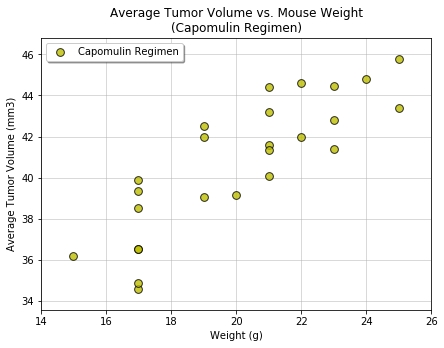

In [35]:
# Calculate min and max for both axes 
ymax = weight_tvol.iloc[:,1].max()
ymin = weight_tvol.iloc[:,1].min()
xmax = weight_tvol.iloc[:,0].max()
xmin = weight_tvol.iloc[:,0].min()

# Generate scatter plot
fig, ax = plt.subplots(figsize=(7, 5))
weight_tvol.plot(kind='scatter', 
                 x='Weight (g)', 
                 y='Average Tumor Volume (mm3)',
                 ylim=(ymin-1, ymax+1),
                 xlim=(xmin-1, xmax+1),
                 legend=True,
                 label=f'{drug} Regimen',
                 color='y', 
                 edgecolors='black',
                 alpha=0.8,
                 s=60,
                 ax=ax)

plt.title(f'Average Tumor Volume vs. Mouse Weight\n({drug} Regimen)')
plt.legend(fancybox=True, shadow=True)

# set grid for both axis
ax.set_axisbelow(True)
ax.grid(alpha=0.6)

plt.show()

#### Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [36]:
# Set x axis and y axis for correlation and ploting
x_axis = weight_tvol['Weight (g)']
y_axis = weight_tvol['Average Tumor Volume (mm3)']

In [37]:
# Calculate correlation coefficient between average tumor volume and mouse weight
pcorr = st.pearsonr(x_axis, y_axis)

print(f"\nPearson's correlation coefficient between average tumor volume and mouse weight: \n{pcorr[0]}")



Pearson's correlation coefficient between average tumor volume and mouse weight: 
0.8419363424694718


In [38]:
# Generate correlation matrix
weight_tvol.corr()

,Weight (g),Average Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Average Tumor Volume (mm3),0.841936,1.000000



R-squared (coefficient of determination): 
0.7088568047708717


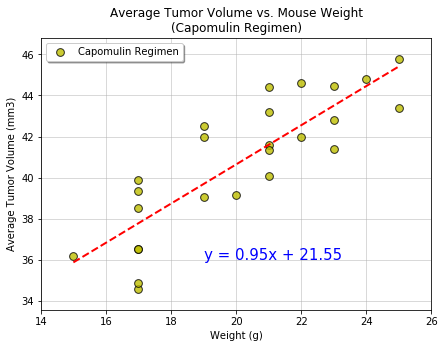

In [39]:
# Perform a linear regression on average tumor volume vs mouse weight
slope, intercept, r_value, p_value, std_err = st.linregress(x_axis, y_axis)
regression = slope * x_axis + intercept

# Create linear regression equation
lreg_eq = 'y = ' + str(round(slope,2)) + 'x + '  + str(round(intercept,2))

# Generate scatter plot
fig, ax = plt.subplots(figsize=(7, 5))
weight_tvol.plot(kind='scatter', 
                 x='Weight (g)', 
                 y='Average Tumor Volume (mm3)',
                 ylim=(ymin-1, ymax+1),
                 xlim=(xmin-1, xmax+1),
                 legend=True,
                 label=f'{drug} Regimen',                 
                 color='y', 
                 edgecolors='black',
                 alpha=0.8,
                 s=60,
                 ax=ax)

# Add linear regression line to plot
ax.plot(x_axis, regression, '--', c='r', linewidth=2)

# Add linear regression equation to plot
plt.annotate(lreg_eq,(19,36),fontsize=15, color='b')

# Set plot title
plt.title(f'Average Tumor Volume vs. Mouse Weight\n({drug} Regimen)')
plt.legend(fancybox=True, shadow=True)

# set grid for both axis
ax.set_axisbelow(True)
ax.grid(alpha=0.6)

print(f"\nR-squared (coefficient of determination): \n{r_value**2}")
plt.show()